In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import matplotlib.patches

In [3]:
df=pd.read_excel('books.xlsx')

In [4]:
df.shape

(6810, 12)

In [5]:
df.isnull().sum()

isbn13               0
isbn10               0
title                0
subtitle          4430
authors             72
categories          99
thumbnail          329
description        263
published_year       6
average_rating      43
num_pages           43
ratings_count       43
dtype: int64

data cleaning

In [6]:
df1=df

In [7]:
df1['subtitle']=df1['subtitle'].fillna('A Novel')

In [8]:
df1.isnull().sum()

isbn13              0
isbn10              0
title               0
subtitle            0
authors            72
categories         99
thumbnail         329
description       263
published_year      6
average_rating     43
num_pages          43
ratings_count      43
dtype: int64

In [9]:
df1[['authors','description','thumbnail']]=df1[['authors','description','thumbnail']].fillna('Not Mentioned')

In [10]:
df1['categories']=df1['categories'].fillna('Fiction')

In [11]:
df1.isnull().sum()

isbn13             0
isbn10             0
title              0
subtitle           0
authors            0
categories         0
thumbnail          0
description        0
published_year     6
average_rating    43
num_pages         43
ratings_count     43
dtype: int64

In [12]:
df1['average_rating']=df1['average_rating'].fillna(df1['average_rating'].median())

In [13]:
df1['published_year']=df1['published_year'].fillna(df1['published_year'].median())

In [14]:
df1['num_pages']=df1['num_pages'].fillna(df1['num_pages'].median())

In [15]:
df1['ratings_count']=df1['ratings_count'].fillna(df1['ratings_count'].median())
df.isnull().sum()

isbn13            0
isbn10            0
title             0
subtitle          0
authors           0
categories        0
thumbnail         0
description       0
published_year    0
average_rating    0
num_pages         0
ratings_count     0
dtype: int64

In [16]:
df1.to_excel("booksnew.xlsx")

cleaned data is downloaded

which are the books with the most occurance in the list

In [17]:
import seaborn as sns

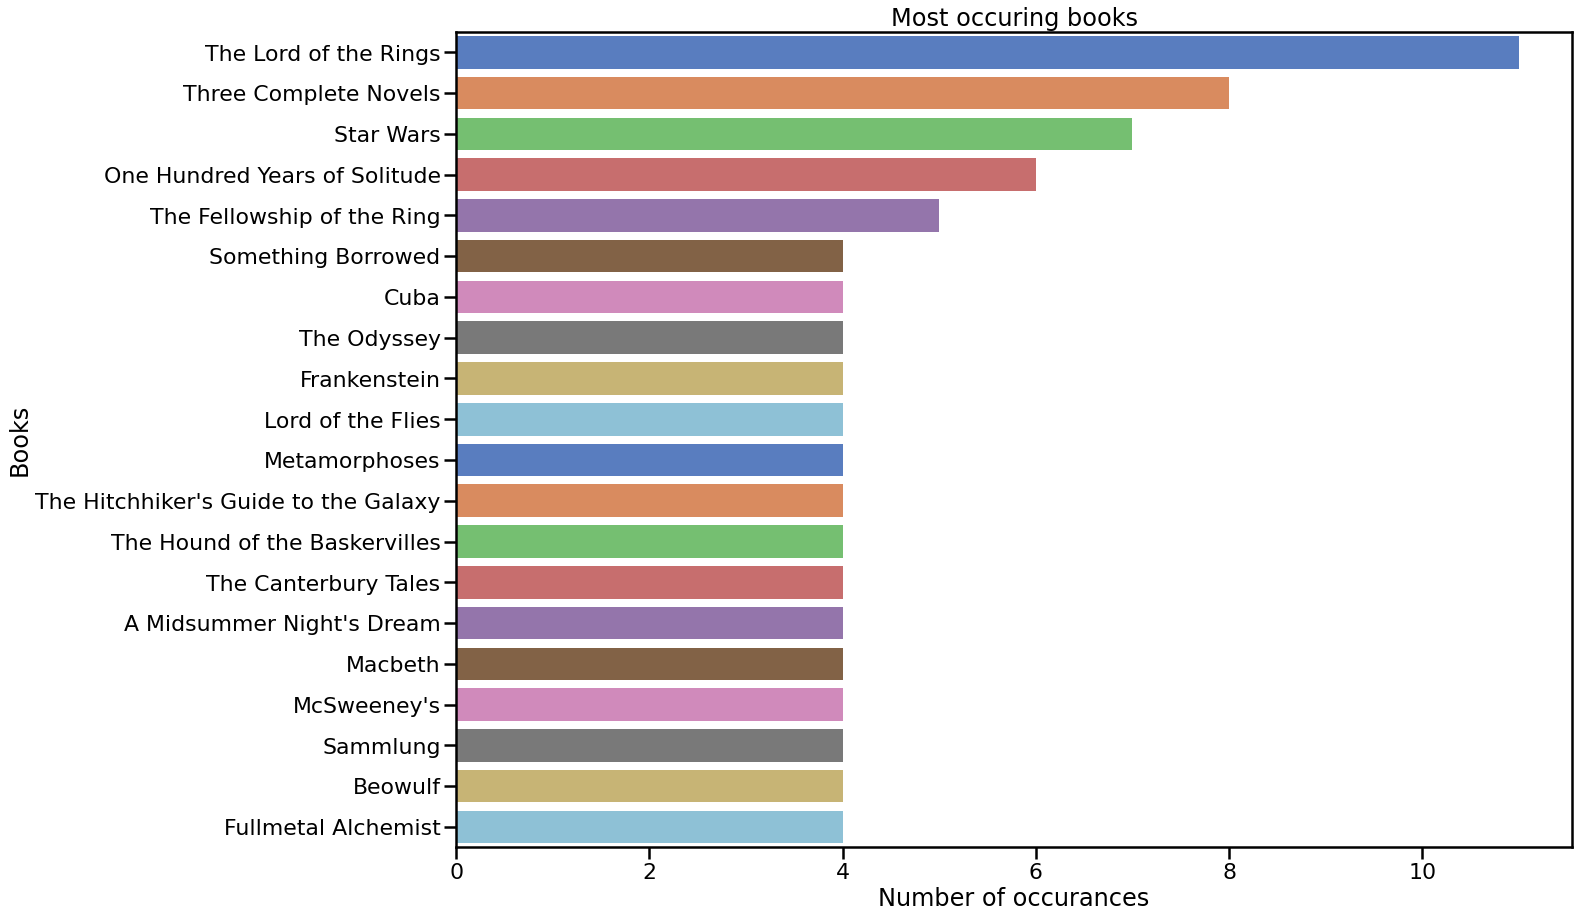

In [18]:
sns.set_context('poster')
plt.figure(figsize=(20,15))
book=df1['title'].value_counts()[:20]
rating=df1.average_rating[:20]
sns.barplot(x=book,y=book.index,palette='muted')
plt.title("Most occuring books")
plt.xlabel("Number of occurances")
plt.ylabel("Books")
plt.show()

which book has the most number of ratings

C:\Users\eshaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ratings_count', ylabel='title'>

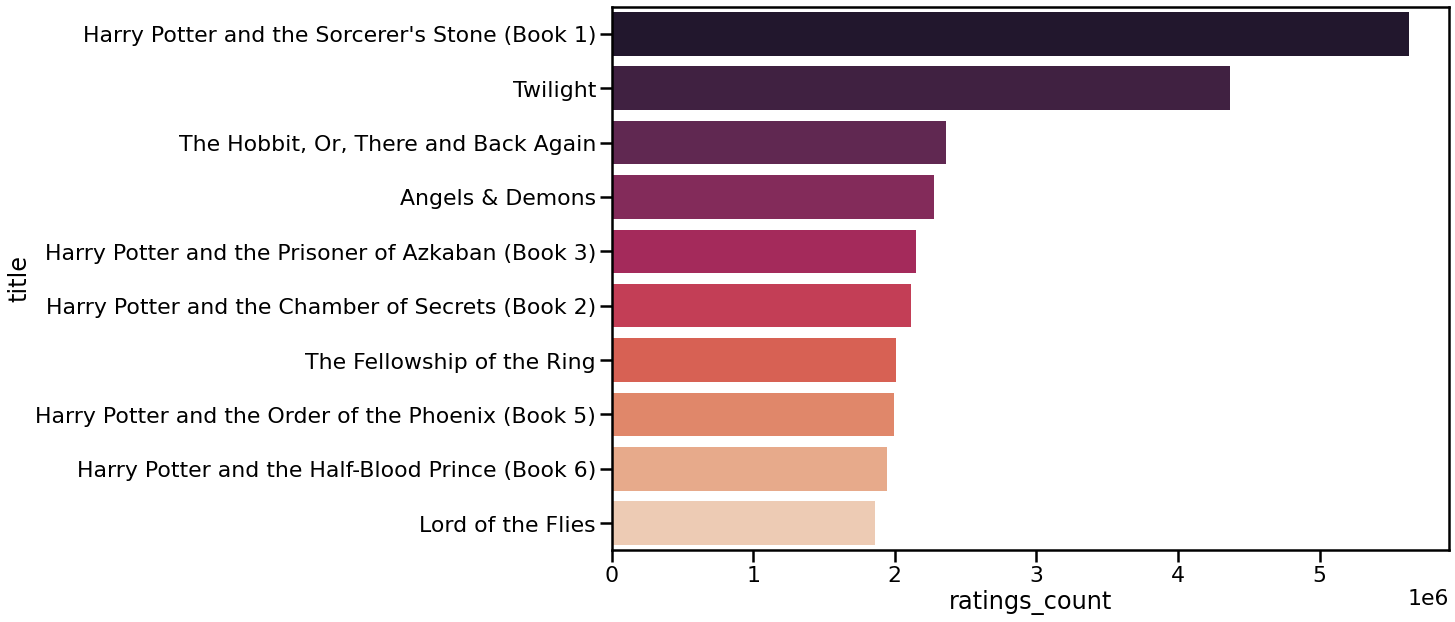

In [19]:
most_rated=df1.sort_values('ratings_count',ascending=False).head(10).set_index('title')
plt.figure(figsize=(15,10))
sns.barplot(most_rated['ratings_count'],most_rated.index,palette='rocket')

Authors with the most books

C:\Users\eshaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Total number of books')

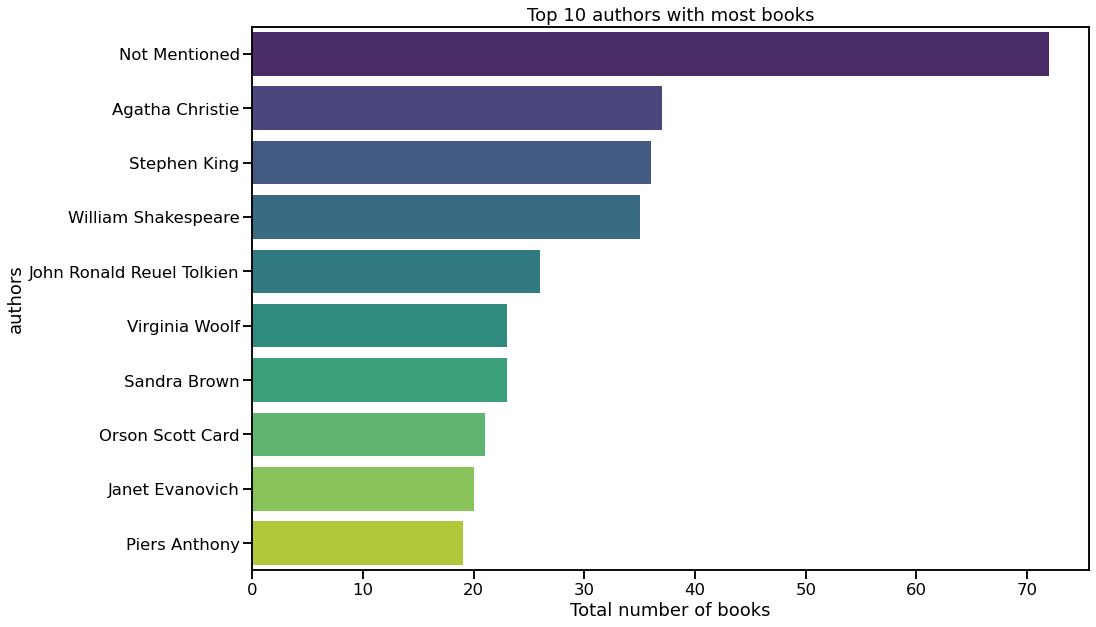

In [20]:
sns.set_context('talk')
most_df=df1.groupby('authors')['title'].count().reset_index().sort_values('title',ascending=False).head(10).set_index('authors')
plt.figure(figsize=(15,10))
ax=sns.barplot(most_df['title'],most_df.index,palette='viridis')
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")



what is the average rating in the dataset

C:\Users\eshaa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='average_rating', ylabel='Density'>

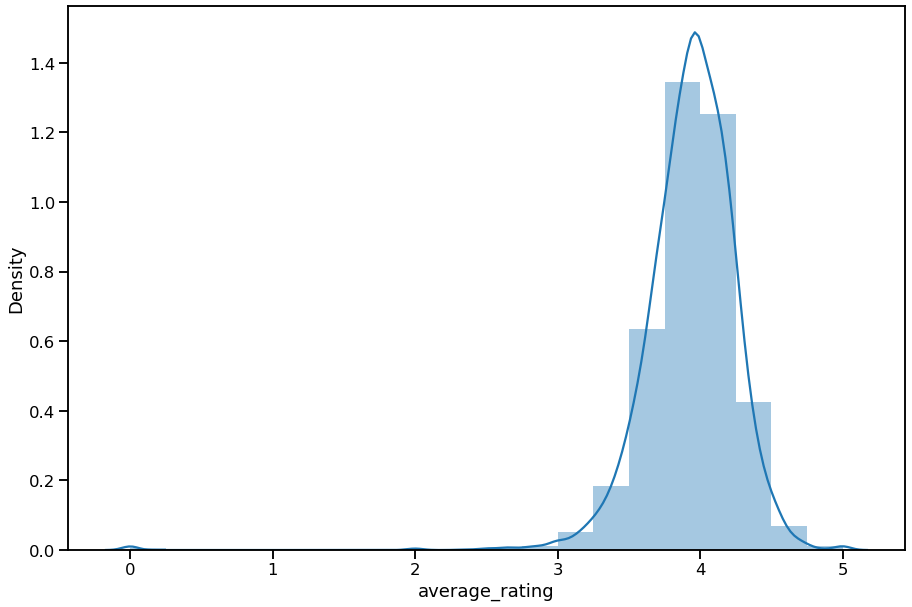

In [21]:
plt.figure(figsize=(15,10))
rating=df.average_rating.astype(float)
sns.distplot(rating,bins=20)

what is the percentage of books lying between different point
(0 to 1) under average books
(1 to 2) average books
(2 to 3) good books
(3 to 4) very good books
(4 to 5) excellent books

In [22]:
def segregation(data):
    values=[]
    for val in data.average_rating:
        if val>=0 and val<=1:
            values.append("Between 0 and 1")
        elif val>=1 and val<=2:
            values.append("Between 1 and 2")
        elif val>=2 and val<=3:
            values.append("Between 2 and 3")
        elif val>=3 and val<=4:
            values.append("Between 3 and 4")
        elif val>=4 and val<=5:
            values.append("Between 4 and 5")
        else:
            values.append("NaN")
    print(len(values))
    return values

6810


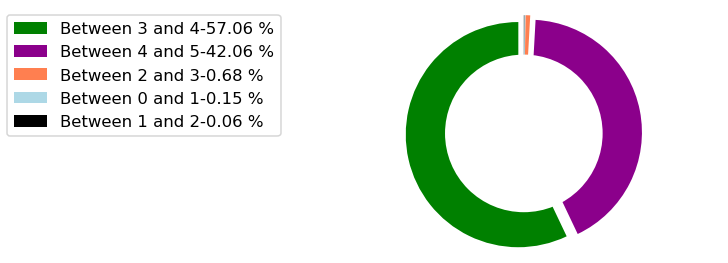

In [23]:
df1['isbn10']=segregation(df1)
ratings_pie=df['isbn10'].value_counts().reset_index()
labels=ratings_pie['index']
colors=['green','darkmagenta','coral','lightblue','black']
percent=100*ratings_pie['isbn10']/ratings_pie['isbn10'].sum()
fig,ax1=plt.subplots()
ax1.pie(ratings_pie['isbn10'],colors=colors,pctdistance=0.85,startangle=90,explode=(0.05,0.05,0.05,0.05,0.05))
centre_circle=matplotlib.patches.Circle((0,0),0.70,fc='white')
fig1=plt.gcf()
fig1.gca().add_artist(centre_circle)
plt.axis('equal')
plt.tight_layout()
labels=['{0}-{1:1.2f} %'.format(i,j) for i,j in zip(labels,percent)]
plt.legend(labels,loc='best',bbox_to_anchor=(-0.1,1.),)

relationship between average rating and number of reviews

C:\Users\eshaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


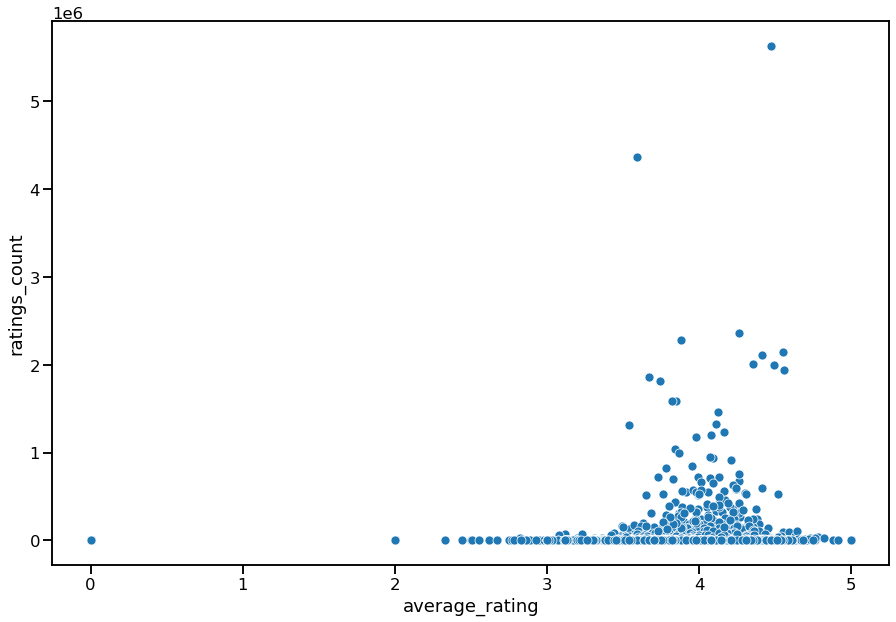

In [24]:
plt.figure(figsize=(15,10))
sns.scatterplot(df1["average_rating"],df1["ratings_count"])
plt.show()

Most ratings are around 4 very less people give full or 0 ratings

relationship between number of pages and average rating

C:\Users\eshaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


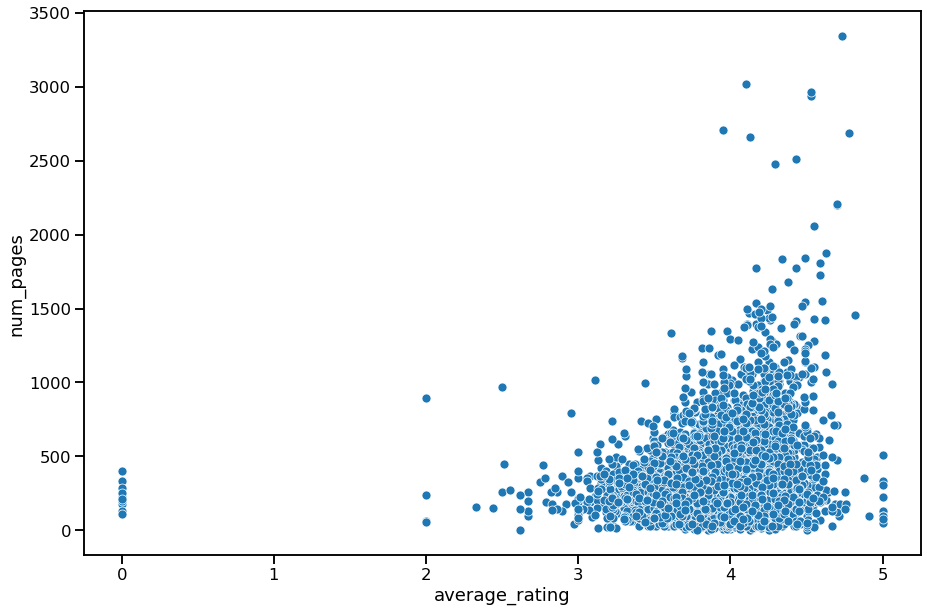

In [25]:
plt.figure(figsize=(15,10))
sns.scatterplot(df1["average_rating"],df1["num_pages"])
plt.show()

genres which have the most occurance

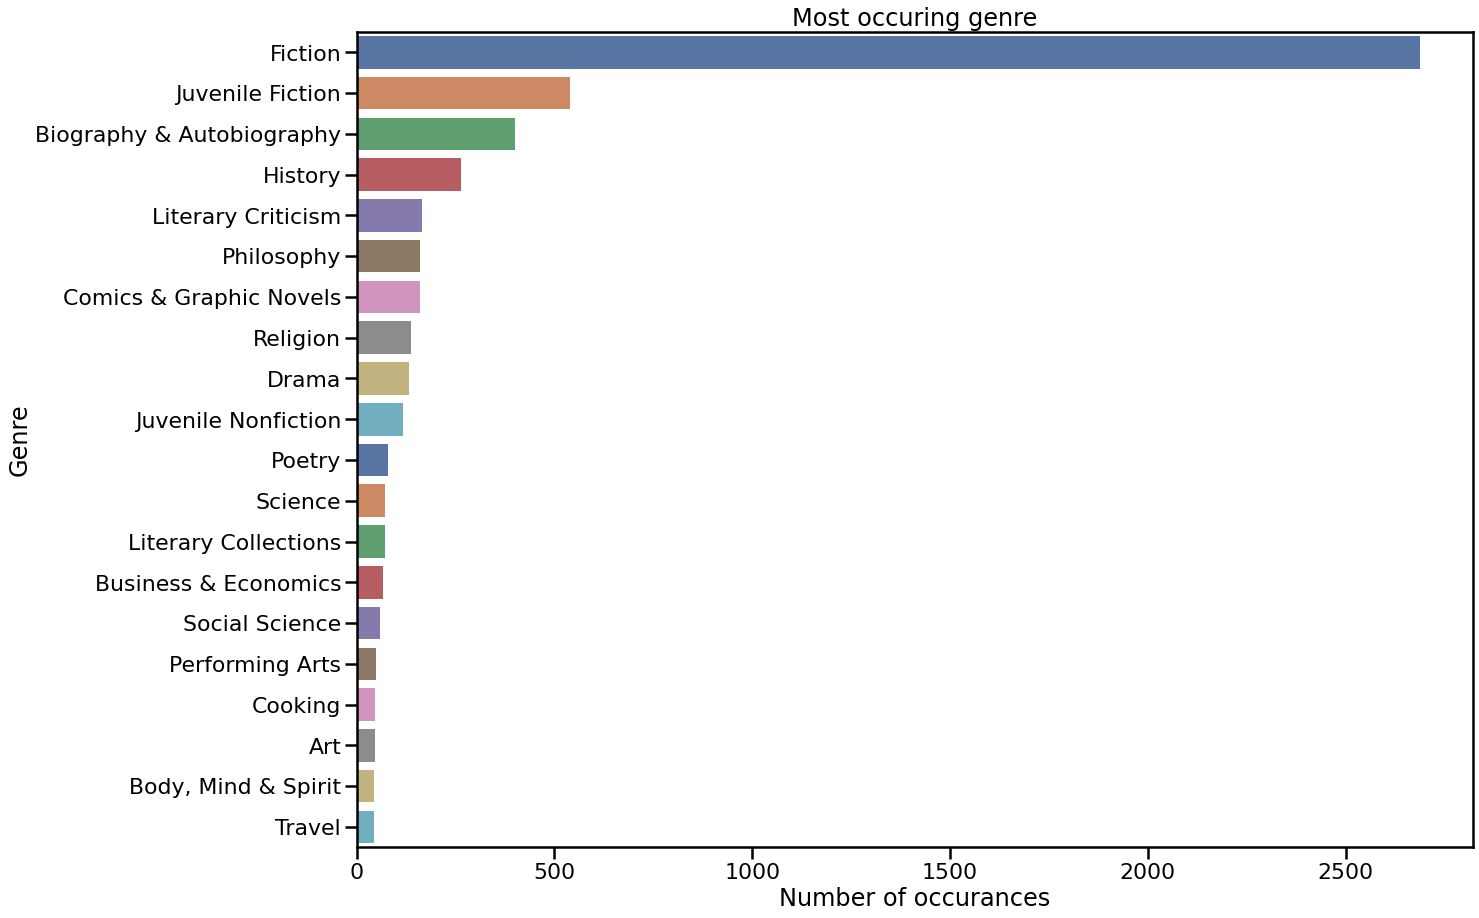

In [26]:
sns.set_context('poster')
plt.figure(figsize=(20,15))
genre=df1['categories'].value_counts()[:20]
sns.barplot(x=genre,y=genre.index,palette='deep')
plt.title("Most occuring genre")
plt.xlabel("Number of occurances")
plt.ylabel("Genre")
plt.show()

Regression model

In [27]:
x=df1[['ratings_count','num_pages']]
y=df1['average_rating']

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [29]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [30]:
pred1=reg.predict(x_test)

In [31]:
from sklearn.metrics import mean_squared_error,r2_score

In [32]:
mean_squared_error(pred1,y_test)

0.12033919811729642

In [33]:
r2_score(pred1,y_test)

-23.940903893070942

In [34]:
from sklearn.tree import DecisionTreeRegressor
dcf=DecisionTreeRegressor()
dcf.fit(x_train,y_train)
pred2=dcf.predict(x_test)

In [35]:
mean_squared_error(pred2,y_test)

0.19824021863272961

In [36]:
r2_score(pred2,y_test)

-0.43967437401737497

In [37]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred3=rf.predict(x_test)

In [38]:
mean_squared_error(pred3,y_test)

0.1273755911188314

In [39]:
r2_score(pred3,y_test)

-1.393718652744092

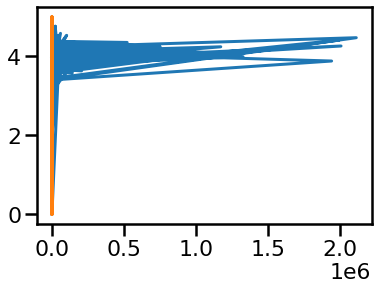

In [40]:
plt.plot(x_test,pred2)
plt.show()

KMeans clustering 
  It is used to find groups in data
    Find relationship b/w rating count and average rating value

In [41]:
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.vq import kmeans, vq
from matplotlib.lines import Line2D

In [42]:
trial=df1[['average_rating','ratings_count']]
data=np.asarray([np.asarray(trial['average_rating']),np.asarray(trial['ratings_count'])]).T

Text(0.5, 1.0, 'Elbow Curve')

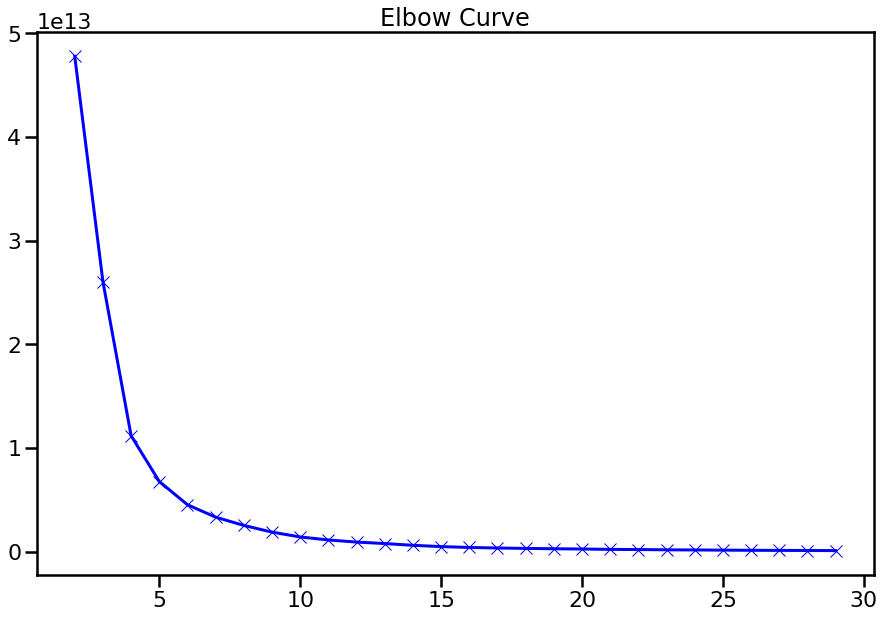

In [43]:
x=data
distortions=[]
for k in range(2,30):
    k_means=KMeans(n_clusters=k)
    k_means.fit(x)
    distortions.append(k_means.inertia_)
fig=plt.figure(figsize=(15,10))
plt.plot(range(2,30),distortions,'bx-')
plt.title("Elbow Curve")

elbow lies at k=5

In [44]:
centroids,_=kmeans(data,5)
idx,_=vq(data,centroids)

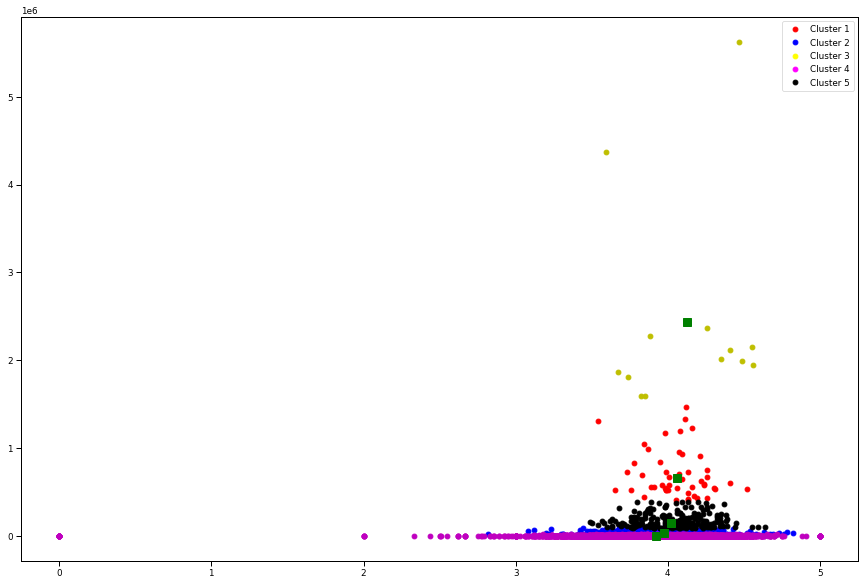

In [45]:
sns.set_context('paper')
plt.figure(figsize=(15,10))
plt.plot(data[idx==0,0],data[idx==0,1],'or',data[idx==1,0],data[idx==1,1],'ob',data[idx==2,0],data[idx==2,1],'oy',data[idx==3,0],data[idx==3,1],'om',data[idx==4,0],data[idx==4,1],'ok',)
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=8,)
circle1=Line2D(range(1),range(1),color='red',linewidth=0,marker='o',markerfacecolor='red')
circle2=Line2D(range(1),range(1),color='blue',linewidth=0,marker='o',markerfacecolor='blue')
circle3=Line2D(range(1),range(1),color='yellow',linewidth=0,marker='o',markerfacecolor='yellow')
circle4=Line2D(range(1),range(1),color='magenta',linewidth=0,marker='o',markerfacecolor='magenta')
circle5=Line2D(range(1),range(1),color='black',linewidth=0,marker='o',markerfacecolor='black')
plt.legend((circle1,circle2,circle3,circle4,circle5),('Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5'),numpoints=1,loc=0,)
plt.show()

In [46]:
trial.idxmax()

average_rating    1441
ratings_count     2698
dtype: int64

In [47]:
trial.drop(2698,inplace=True)

C:\Users\eshaa\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [48]:
data=np.asarray([np.asarray(trial['average_rating']),np.asarray(trial['ratings_count'])]).T

In [49]:
centroids,_=kmeans(data,5)
idx,_=vq(data,centroids)

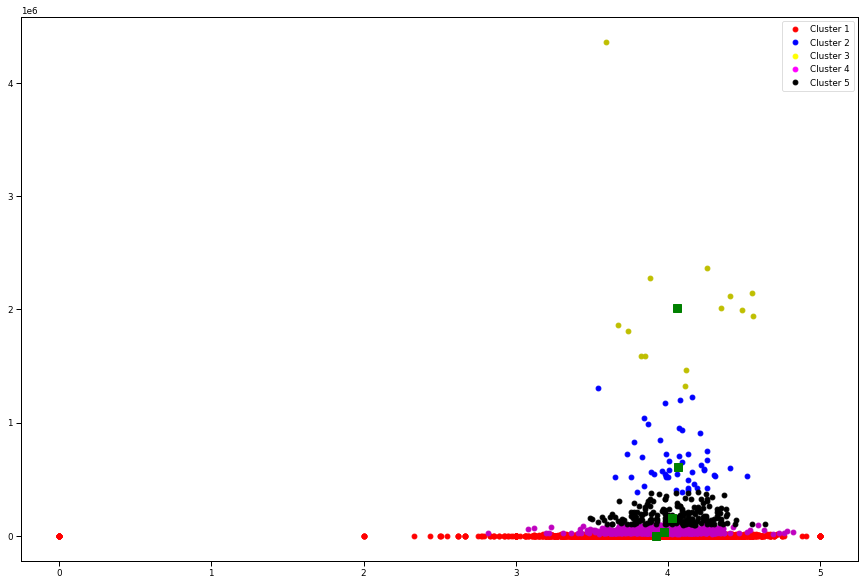

In [50]:
sns.set_context('paper')
plt.figure(figsize=(15,10))
plt.plot(data[idx==0,0],data[idx==0,1],'or',data[idx==1,0],data[idx==1,1],'ob',data[idx==2,0],data[idx==2,1],'oy',data[idx==3,0],data[idx==3,1],'om',data[idx==4,0],data[idx==4,1],'ok',)
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=8,)
circle1=Line2D(range(1),range(1),color='red',linewidth=0,marker='o',markerfacecolor='red')
circle2=Line2D(range(1),range(1),color='blue',linewidth=0,marker='o',markerfacecolor='blue')
circle3=Line2D(range(1),range(1),color='yellow',linewidth=0,marker='o',markerfacecolor='yellow')
circle4=Line2D(range(1),range(1),color='magenta',linewidth=0,marker='o',markerfacecolor='magenta')
circle5=Line2D(range(1),range(1),color='black',linewidth=0,marker='o',markerfacecolor='black')
plt.legend((circle1,circle2,circle3,circle4,circle5),('Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5'),numpoints=1,loc=0,)
plt.show()

In [63]:
trial=df1[['published_year','ratings_count']]
data=np.asarray([np.asarray(trial['published_year']),np.asarray(trial['ratings_count'])]).T

Text(0.5, 1.0, 'Elbow Curve')

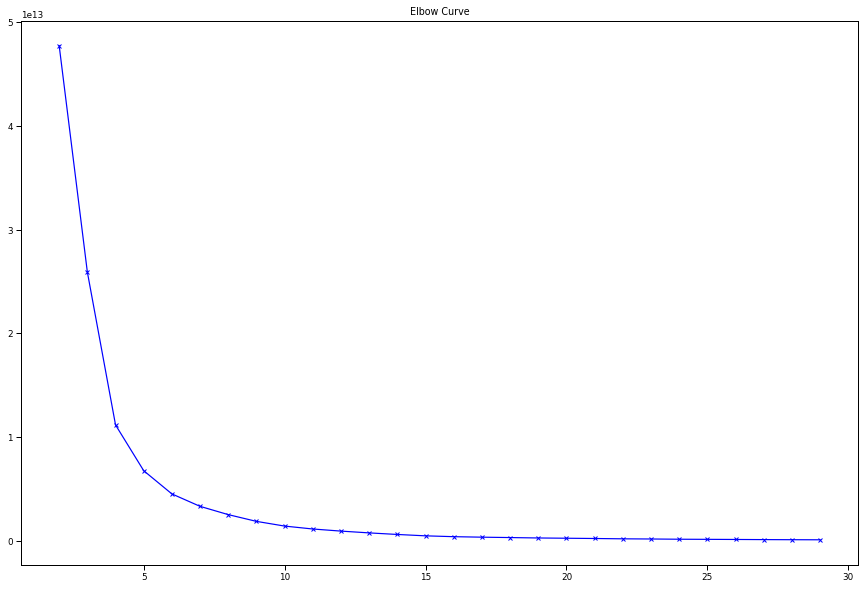

In [64]:
x=data
distortions=[]
for k in range(2,30):
    k_means=KMeans(n_clusters=k)
    k_means.fit(x)
    distortions.append(k_means.inertia_)
fig=plt.figure(figsize=(15,10))
plt.plot(range(2,30),distortions,'bx-')
plt.title("Elbow Curve")

In [65]:
centroids,_=kmeans(data,5)
idx,_=vq(data,centroids)

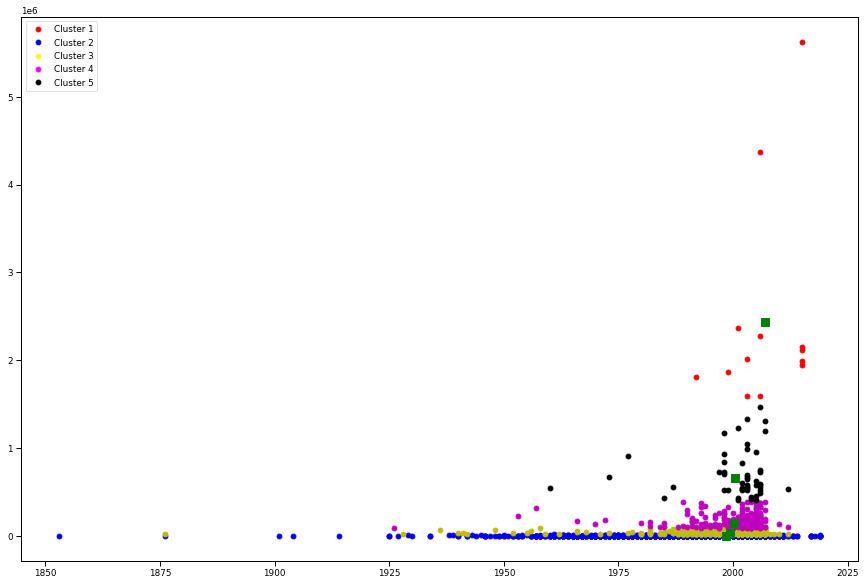

In [66]:
sns.set_context('paper')
plt.figure(figsize=(15,10))
plt.plot(data[idx==0,0],data[idx==0,1],'or',data[idx==1,0],data[idx==1,1],'ob',data[idx==2,0],data[idx==2,1],'oy',data[idx==3,0],data[idx==3,1],'om',data[idx==4,0],data[idx==4,1],'ok',)
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=8,)
circle1=Line2D(range(1),range(1),color='red',linewidth=0,marker='o',markerfacecolor='red')
circle2=Line2D(range(1),range(1),color='blue',linewidth=0,marker='o',markerfacecolor='blue')
circle3=Line2D(range(1),range(1),color='yellow',linewidth=0,marker='o',markerfacecolor='yellow')
circle4=Line2D(range(1),range(1),color='magenta',linewidth=0,marker='o',markerfacecolor='magenta')
circle5=Line2D(range(1),range(1),color='black',linewidth=0,marker='o',markerfacecolor='black')
plt.legend((circle1,circle2,circle3,circle4,circle5),('Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5'),numpoints=1,loc=0,)
plt.show()

In [67]:
trial.idxmax()

published_year    2060
ratings_count     2698
dtype: int64

In [68]:
trial.drop(2698,inplace=True)

C:\Users\eshaa\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [69]:
data=np.asarray([np.asarray(trial['published_year']),np.asarray(trial['ratings_count'])]).T

In [70]:
centroids,_=kmeans(data,5)
idx,_=vq(data,centroids)

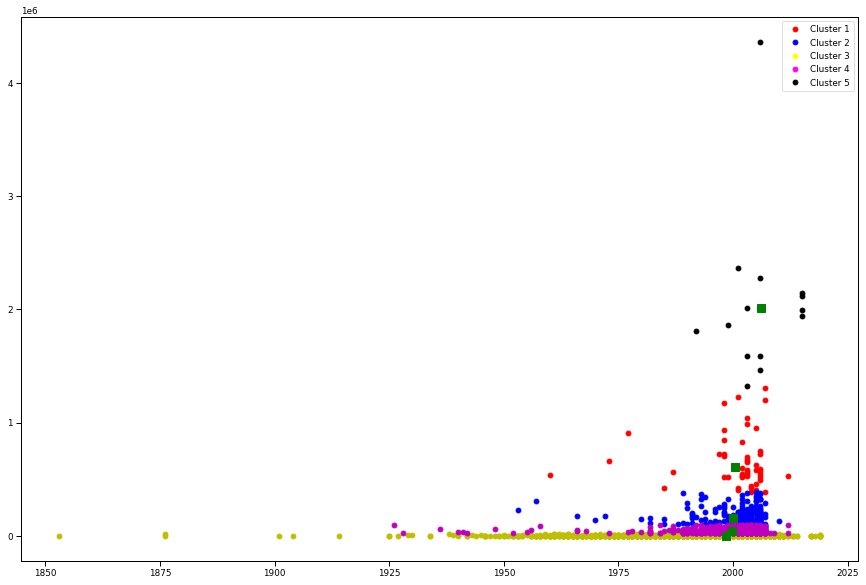

In [71]:
sns.set_context('paper')
plt.figure(figsize=(15,10))
plt.plot(data[idx==0,0],data[idx==0,1],'or',data[idx==1,0],data[idx==1,1],'ob',data[idx==2,0],data[idx==2,1],'oy',data[idx==3,0],data[idx==3,1],'om',data[idx==4,0],data[idx==4,1],'ok',)
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=8,)
circle1=Line2D(range(1),range(1),color='red',linewidth=0,marker='o',markerfacecolor='red')
circle2=Line2D(range(1),range(1),color='blue',linewidth=0,marker='o',markerfacecolor='blue')
circle3=Line2D(range(1),range(1),color='yellow',linewidth=0,marker='o',markerfacecolor='yellow')
circle4=Line2D(range(1),range(1),color='magenta',linewidth=0,marker='o',markerfacecolor='magenta')
circle5=Line2D(range(1),range(1),color='black',linewidth=0,marker='o',markerfacecolor='black')
plt.legend((circle1,circle2,circle3,circle4,circle5),('Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5'),numpoints=1,loc=0,)
plt.show()